In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.axes as ax

In [27]:
import kagglehub
import shutil

# Log in to Kaggle
kagglehub.login()

# Step 1: Download to a local directory (relative path)
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Downloaded to:", path)

# Step 2: Copy dataset to Google Drive (if using Colab)
drive_path = "/content/drive/MyDrive/machine_learning/linear_regression_model_data/"
shutil.copytree(path, drive_path, dirs_exist_ok=True)

print("Copied dataset to:", drive_path)


Downloaded to: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1
Copied dataset to: /content/drive/MyDrive/machine_learning/linear_regression_model_data/


In [28]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/machine learning/linear_regression_model_data/archive.zip", "r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/machine learning/linear_regression_model_data/")


In [69]:
data = pd.read_csv("/content/drive/MyDrive/machine learning/linear_regression_model_data/Housing.csv")

In [70]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [72]:
df = pd.DataFrame(data)

In [73]:
df.rename(columns={'area': 'SquareFeet'}, inplace=True)
df.rename(columns={'price': 'Price'}, inplace=True)

In [74]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [35]:
from IPython.display import Markdown, display
display(Markdown("## Splitting Data"))

## Splitting Data

In [87]:
data.dtypes


,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [88]:
# Encode all categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

In [90]:
x = data_encoded.iloc[:,1:].values
y = data_encoded.iloc[:,0].values.reshape(-1,1)


split = int(0.8 * len(data))  # 80% for training

#training input and output data
train_input, test_input = x[:split], x[split:]
train_output, test_output = y[:split], y[split:]
train_input = np.array(train_input, dtype=float)
train_output = np.array(train_output, dtype=float)
test_input = np.array(test_input, dtype=float)
test_output = np.array(test_output, dtype=float)




In [37]:
from IPython.display import HTML, display
display(HTML("<font color='green' size='5'><b>Linear Regression</b></font>"))


In [38]:
from IPython.display import Markdown, display
display(Markdown("## Forward propagation"))

## Forward propagation

In [83]:
def forward_propagation(train_input,parameters):
  W = parameters["W"]
  b = parameters["b"]

  predictions = np.dot(train_input, W) + b
  return predictions

In [40]:
from IPython.display import Markdown, display
display(Markdown("## Cost function"))

## Cost function

In [41]:
def cost_fucntion(predictions, train_output):
  cost = np.mean((train_output - predictions)**2)*0.5
  return cost

In [42]:
from IPython.display import Markdown, display
display(Markdown("## gradient descent backword propagation"))

## gradient descent backword propagation

In [79]:
def backward_propagation(train_input, train_output, predictions):
    m = train_input.shape[0]
    dW = (1/m) * np.dot(train_input.T, (predictions - train_output))
    db = np.mean(predictions - train_output)
    derivatives = {"dW": dW, "db": db}
    return derivatives


In [44]:
from IPython.display import Markdown, display
display(Markdown("## update parameters"))

## update parameters

In [80]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters["W"] -= learning_rate * derivatives["dW"]
    parameters["b"] -= learning_rate * derivatives["db"]
    return parameters


In [46]:
from IPython.display import Markdown, display
display(Markdown("## Model training"))

## Model training

In [94]:
def train(train_input, train_output, learning_rate=0.01, iters=10000):
    n_features = train_input.shape[1]

    # Initialize parameters
    parameters = {
        "W": np.random.randn(n_features, 1),
        "b": np.random.randn(1)
    }

    loss = []

    for i in range(iters):
        # ---- Forward ----
        predictions = forward_propagation(train_input, parameters)

        # ---- Cost ----
        cost = cost_fucntion(predictions, train_output)
        loss.append(cost)

        # ---- Log progress ----
        if (i + 1) % max(1, (iters // 10)) == 0:
            print(f"Iteration = {i+1}/{iters}, Loss = {cost:.6f}")

        # ---- Visualization ----
        # If single feature, show regression line evolution
        if train_input.shape[1] == 1 and (i + 1) % (iters // 5) == 0:
            plt.figure(figsize=(5,3))
            plt.scatter(train_input, train_output, color='red', label='Actual')
            plt.plot(train_input, predictions, color='blue', label='Predicted')
            plt.title(f"Iteration {i+1} | Loss = {cost:.4f}")
            plt.xlabel("X")
            plt.ylabel("y")
            plt.legend()
            plt.show()

        # ---- Backprop + Update ----
        derivatives = backward_propagation(train_input, train_output, predictions)
        parameters = update_parameters(parameters, derivatives, learning_rate)

    # ---- After training ----
    print("\n✅ Training complete!")

    # ---- Plot loss curve ----
    plt.figure(figsize=(6,4))
    plt.plot(loss, color='purple')
    plt.title("Loss over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # ---- Predicted vs Actual ----
    preds = np.dot(train_input, parameters['W']) + parameters['b']

    plt.figure(figsize=(6,6))
    plt.scatter(train_output, preds, color='blue', alpha=0.6, label='Predicted')
    plt.plot([train_output.min(), train_output.max()],
             [train_output.min(), train_output.max()],
             'r--', label='Perfect Fit')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Predicted vs Actual Prices")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    return parameters, loss

In [48]:
from IPython.display import Markdown,display
display(Markdown("## Training the model"))


## Training the model

Iteration = 200/2000, Loss = 5259158111552.885742
Iteration = 400/2000, Loss = 2721890743211.390137
Iteration = 600/2000, Loss = 2096977064786.330322
Iteration = 800/2000, Loss = 1943064517051.302246
Iteration = 1000/2000, Loss = 1905156694948.904785
Iteration = 1200/2000, Loss = 1895820134128.600830
Iteration = 1400/2000, Loss = 1893520501905.806396
Iteration = 1600/2000, Loss = 1892954022573.875977
Iteration = 1800/2000, Loss = 1892814408301.260254
Iteration = 2000/2000, Loss = 1892779928307.239014

✅ Training complete!


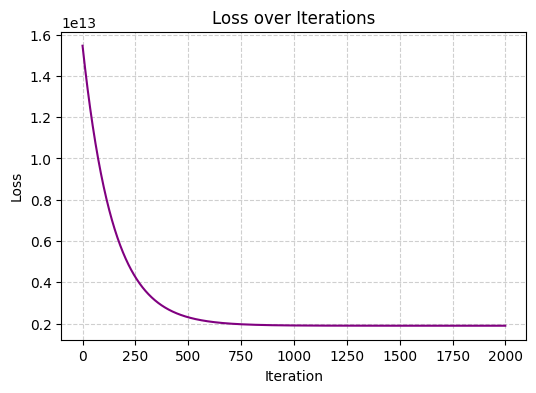

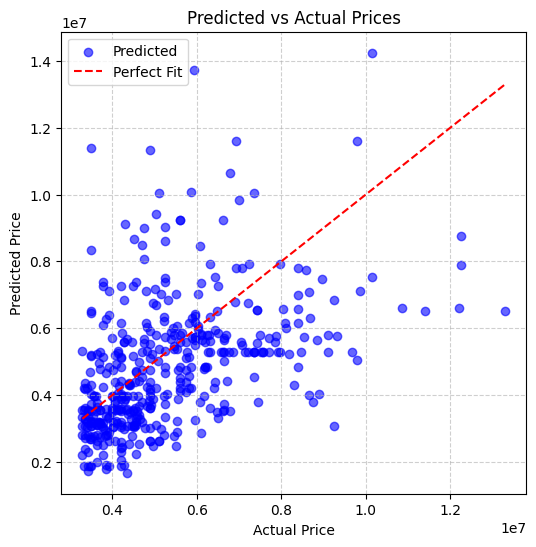

{'W': array([[ 8.79295023e+02],
       [ 7.25423131e-01],
       [-5.27251001e-01],
       [ 8.32134566e-01],
       [-8.30483264e-01],
       [-4.94820539e-01],
       [ 1.16427564e+00],
       [-2.40888438e-01],
       [ 3.58802749e-01],
       [-3.29820194e-01],
       [-2.13267874e-01],
       [ 3.97844291e-01],
       [ 3.01873062e+00]]), 'b': array([-0.36264834])}


In [101]:
parameters, loss = train(train_input, train_output, learning_rate=0.0000000001, iters=2000)
print(parameters)


In [92]:
print(parameters)

{'W': array([[880.05922494],
       [ 33.70581335],
       [ 18.6265601 ],
       [ 28.54522282],
       [  6.68821272],
       [  9.77826436],
       [  3.90268025],
       [  5.78577337],
       [  1.22588152],
       [  7.39229066],
       [  4.83388233],
       [  6.76043306],
       [  1.76738384]]), 'b': array([10.24526426])}


In [93]:
loss

[np.float64(15456352139916.977),
 np.float64(7628767975975.241),
 np.float64(4318504491117.461),
 np.float64(2918603286355.315),
 np.float64(2326588946501.8267),
 np.float64(2076227702133.0718),
 np.float64(1970350596230.2861),
 np.float64(1925575428358.0498),
 np.float64(1906640099174.8801),
 np.float64(1898632365498.472),
 np.float64(1895245881397.0435),
 np.float64(1893813710815.0964),
 np.float64(1893208013954.2617),
 np.float64(1892951830518.415),
 np.float64(1892843455332.3977),
 np.float64(1892797587841.811),
 np.float64(1892778154680.7869),
 np.float64(1892769900523.8008),
 np.float64(1892766373936.356),
 np.float64(1892764846624.8484),
 np.float64(1892764164801.5454),
 np.float64(1892763840532.8406),
 np.float64(1892763667472.9783),
 np.float64(1892763558358.9133),
 np.float64(1892763476287.3499),
 np.float64(1892763405651.9873),
 np.float64(1892763339852.9634),
 np.float64(1892763276099.216),
 np.float64(1892763213210.4124),
 np.float64(1892763150687.3928),
 np.float64(189276

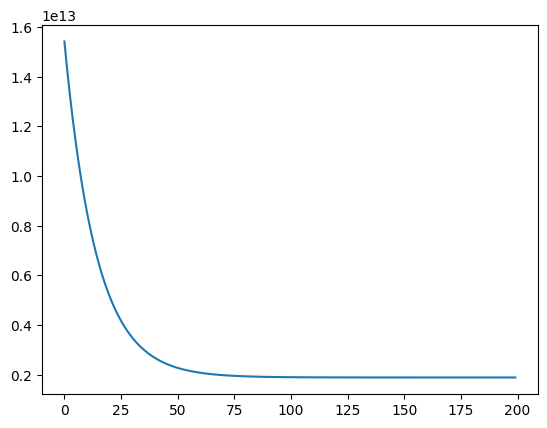

In [56]:
plt.plot(loss)

In [57]:
from IPython.display import Markdown,display
display(Markdown("## let's predict"))


## let's predict

In [58]:
test_predictions = test_input * parameters["m"] + parameters["c"]


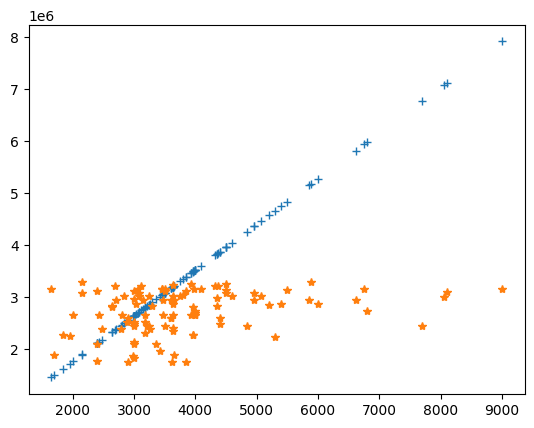

In [59]:
plt.plot(test_input,test_predictions,"+")
plt.plot(test_input,test_output,"*")